In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_json('./MSFT.json')
plt.style.use('fivethirtyeight')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [2]:
df.head()

,adjusted_mark_price,ask_price,ask_size,bid_price,bid_size,break_even_price,high_price,instrument,last_trade_price,last_trade_size,...,id,issue_date,min_ticks,rhs_tradability,state,strike_price,tradability,type,updated_at,url
0,2.93,3.20,38,2.65,36,182.93,3.07,https://api.robinhood.com/options/instruments/...,2.90,1.0,...,deb0639f-0ec9-4229-92f8-5a60e4435b52,1987-03-12,"{'above_tick': '0.05', 'below_tick': '0.01', '...",untradable,active,180.0,tradable,call,2020-04-02 03:17:25.755767+00:00,https://api.robinhood.com/options/instruments/...
1,16.48,17.90,47,15.05,30,161.02,NaN,https://api.robinhood.com/options/instruments/...,18.42,1.0,...,65753d5b-86b4-40d1-8b0f-13a33e517c02,1987-03-12,"{'above_tick': '0.05', 'below_tick': '0.01', '...",untradable,active,177.5,tradable,put,2020-04-02 03:17:25.755713+00:00,https://api.robinhood.com/options/instruments/...
2,6.40,7.35,40,5.45,51,176.40,7.00,https://api.robinhood.com/options/instruments/...,7.00,1.0,...,079cb79c-fec1-4ff7-9b52-1795c1d0de36,1987-03-12,"{'above_tick': '0.05', 'below_tick': '0.01', '...",untradable,active,170.0,tradable,call,2020-04-02 03:17:25.755647+00:00,https://api.robinhood.com/options/instruments/...
3,24.78,26.55,30,23.00,56,167.78,NaN,https://api.robinhood.com/options/instruments/...,NaN,NaN,...,07bd1a2a-85b8-4741-840b-93763375f0d6,1987-03-12,"{'above_tick': '0.05', 'below_tick': '0.01', '...",untradable,active,143.0,tradable,call,2020-04-02 03:17:25.755595+00:00,https://api.robinhood.com/options/instruments/...
4,3.06,3.45,32,2.66,35,138.94,2.50,https://api.robinhood.com/options/instruments/...,2.50,1.0,...,7e8c9f81-727f-421d-97bb-37062553c8a4,1987-03-12,"{'above_tick': '0.05', 'below_tick': '0.01', '...",untradable,active,142.0,tradable,put,2020-04-02 03:17:25.755544+00:00,https://api.robinhood.com/options/instruments/...


In [3]:
dfcall = df[df['type'] == 'call']

In [4]:
dfcall['expiration_date'].unique()

array(['2020-05-22', '2020-04-17', '2020-05-08', '2020-04-24',
       '2020-05-01', '2022-09-16', '2022-06-17', '2021-03-19',
       '2020-09-18'], dtype=object)

In [5]:
# dfcall['expiration_date'] = pd.to_datetime(dfcall['expiration_date'], format='%Y-%m-%d')

In [25]:
dfcall['expiration_date'].unique()

array(['2020-05-22T00:00:00.000000000', '2020-04-17T00:00:00.000000000',
       '2020-05-08T00:00:00.000000000', '2020-04-24T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2022-09-16T00:00:00.000000000',
       '2022-06-17T00:00:00.000000000', '2021-03-19T00:00:00.000000000',
       '2020-09-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
dfcall.iloc[:]['expiration_date'] = dfcall['expiration_date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'));

In [20]:
dfcall['expiration_date'].unique()

array(['2020-05-22T00:00:00.000000000', '2020-04-17T00:00:00.000000000',
       '2020-05-08T00:00:00.000000000', '2020-04-24T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2022-09-16T00:00:00.000000000',
       '2022-06-17T00:00:00.000000000', '2021-03-19T00:00:00.000000000',
       '2020-09-18T00:00:00.000000000'], dtype='datetime64[ns]')

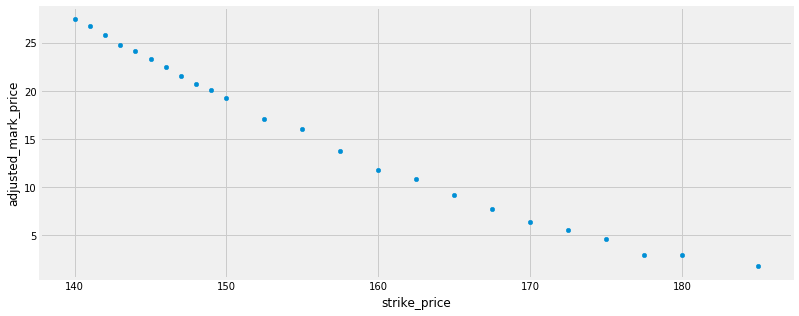

In [32]:
dfcall[dfcall['expiration_date'] == dfcall['expiration_date'].unique()[0]].plot.scatter('strike_price', 'adjusted_mark_price', figsize=(12,5))

In [76]:
m = 6
n = 61
S0 = 70
S1 = 130
K = 100
r = 0.12
T = 1.0
sigma = 0.10

import scipy
from scipy.stats import norm
time = scipy.linspace(T,0.0,m)
S = scipy.linspace ( S0 , S1 , n )
logSoverK = scipy . log ( S / K )
n12 = (( r + sigma **2/2) *( T - time ) )
n22 = (( r - sigma **2/2) *( T - time ) )
numerd1 = logSoverK [ scipy.newaxis ,:] + n12 [: , scipy.newaxis ]
numerd2 = logSoverK [ scipy.newaxis ,:] + n22 [: , scipy.newaxis ]
d1 = numerd1 //( sigma * scipy.sqrt(T - time ) [: , scipy.newaxis ])
d2 = numerd2 //( sigma * scipy.sqrt(T - time ) [: , scipy.newaxis ])


part1 = S [ scipy.newaxis ] * norm . cdf ( d1 )
part2 = norm . cdf ( d2 ) * K * scipy . exp ( - r *( T - time ) ) [: , scipy.newaxis ]
VC = part1 - part2
scipy.savetxt('solution.dat', scipy.column_stack((scipy.transpose(S), scipy.transpose(VC))),fmt=('%4.3f'))

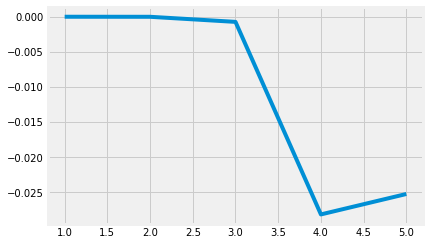

In [86]:
plt.plot(scipy.transpose(VC)[0]);

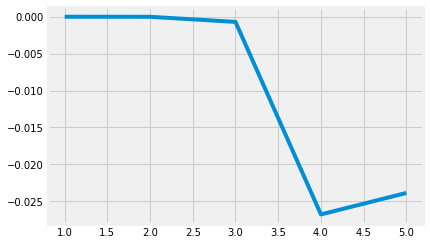

In [87]:
plt.plot(scipy.transpose(VC)[1]);

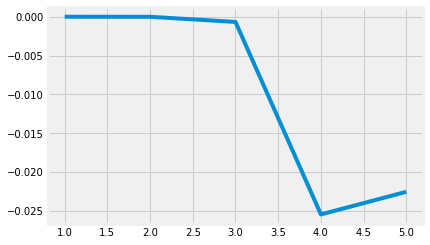

In [88]:
plt.plot(scipy.transpose(VC)[2]);

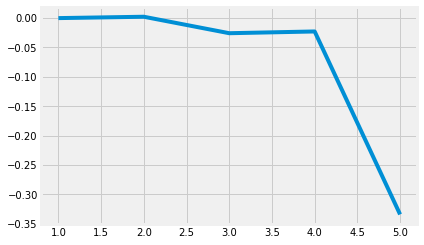

In [89]:
plt.plot(scipy.transpose(VC)[4]);

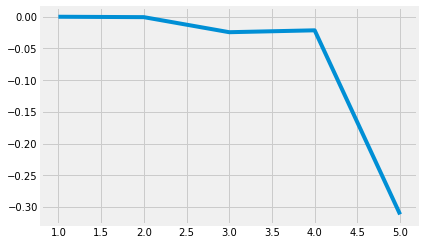

In [90]:
plt.plot(scipy.transpose(VC)[5]);